## Introduction
In the modern world, the Internet has become an indispensable part of daily life, enabling access, interaction, and functionality across almost every domain. Among its many applications, social media holds a prominent position, serving diverse purposes from personal communication to business promotion. When used responsibly, it offers significant benefits, fostering global connectivity, collaboration, and the exchange of ideas.

However, the influence of social media also carries challenges. Its misuse can lead to distractions, particularly among students and young users, who may be exposed to inappropriate or sensitive content at an early age. This highlights the need for mindful and ethical usage to ensure that social media remains a tool for positive engagement and societal growth. 

This visual analysis examines various factors that define the interaction between students and social media. The study begins with an age distribution analysis, followed by the classification of users across educational levels, including undergraduate, postgraduate, and lower levels. It also explores country-wise usage trends to understand regional variations. Furthermore, the analysis identifies the most commonly used social media platforms overall and compares platform preferences based on gender. Additional insights include the average daily usage hours, time spent on social media, and its influence on students’ mental health and sleep cycles. Together, these findings provide a comprehensive view of how social media engagement varies across demographics and its potential implications on student well-being.

This notebook is largely based on the Kaggle project:  
[**Social Media Addiction Among Student's**](https://www.kaggle.com/code/vishnuvardhanreddy27/social-media-addiction-among-student-s) by *vishnuvardhanreddy27*.  

The majority of the analysis follows the original work for learning purposes.
I have additionally included:
- Extra visualizations and statistical summaries  
- Additional interpretation of results  
- Minor refinements to presentation and layout  

Credit goes to the original author for the core analysis workflow.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\projects\EDA_kaggle\Students Social Media Addiction.csv")

In [5]:
# First five rows of the data set
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [16]:
# To print Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [17]:
# To describe the data
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [21]:
# To know unique values of all catagory
catagorical_columns = df.select_dtypes(include=['object']).columns
for col in catagorical_columns :
    print(f"\nUnique values in {col} ")
    print(df[col].value_counts())



Unique values in Gender 
Gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in Academic_Level 
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in Country 
Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

Unique values in Most_Used_Platform 
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

Unique values in Affects_Academic_Performance 
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in Relationship_Status 
Relationship_Status
Single             384
In Relati

## Students distribution

Gender
Female    353
Male      352
Name: count, dtype: int64


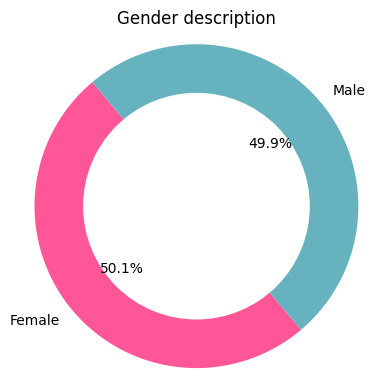

In [6]:
# Gender distribution among students
gender_counts = df['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(4,4))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=130, colors=['#ff5698','#66b3bf'])
centre_c = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_c)
plt.axis('equal')
plt.title('Gender description')
plt.tight_layout()
plt.show()

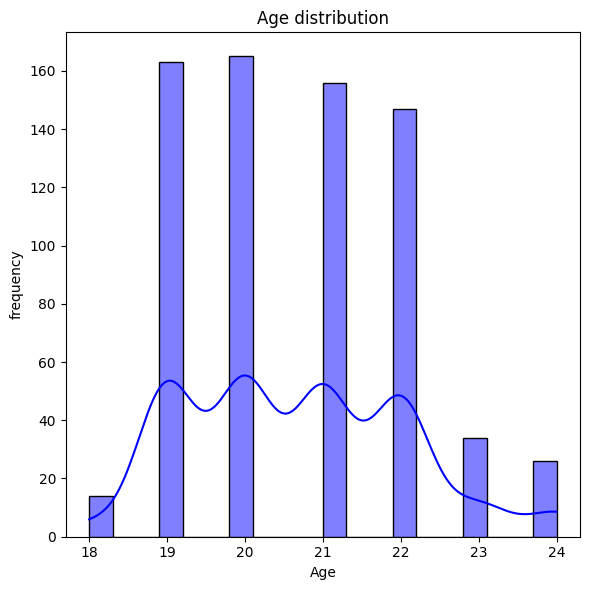

In [7]:
# Age distribution of students
Age = df['Age'];
plt.figure(figsize=(6,6))
sns.histplot(Age,kde=True,bins=20,color='blue')
plt.title('Age distribution')
plt.ylabel('frequency')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

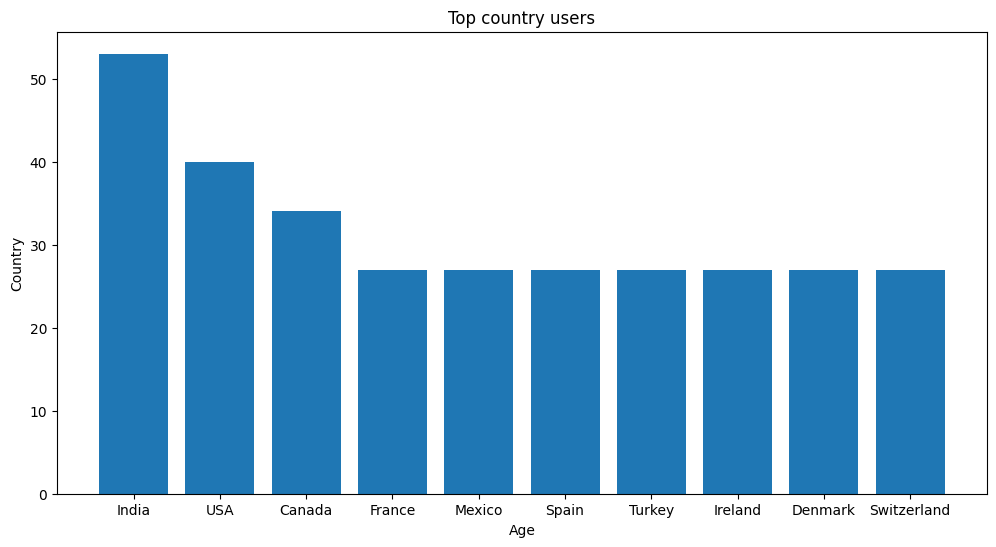

In [11]:
#country distribution
country_info = df['Country'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(country_info.index,country_info.values)
plt.xlabel('Age')
plt.ylabel('Country')
plt.title('Top country users')
plt.show()

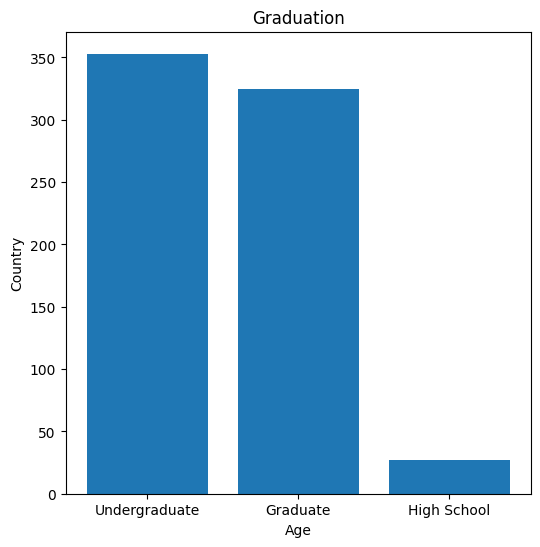

In [12]:
#Academic Distribution
plt.figure(figsize=(6,6))
graduation_info = df['Academic_Level'].value_counts()
plt.bar(graduation_info.index,graduation_info.values)
plt.xlabel('Age')
plt.ylabel('Country')
plt.title('Graduation')
plt.show()

## Usage pattern Analysis

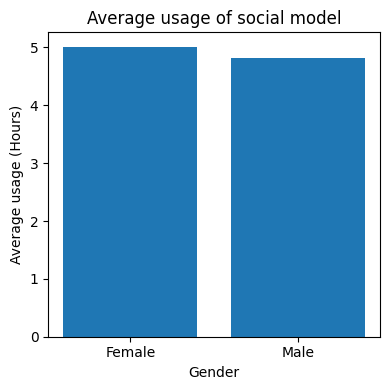

In [30]:
# Average usage for each gender
mean_usage = df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().reset_index()
plt.figure(figsize=(4,4))
plt.bar(mean_usage['Gender'], mean_usage['Avg_Daily_Usage_Hours'])
plt.xlabel('Gender')
plt.ylabel('Average usage (Hours)')
plt.title('Average usage of social model')
plt.tight_layout()
plt.show()

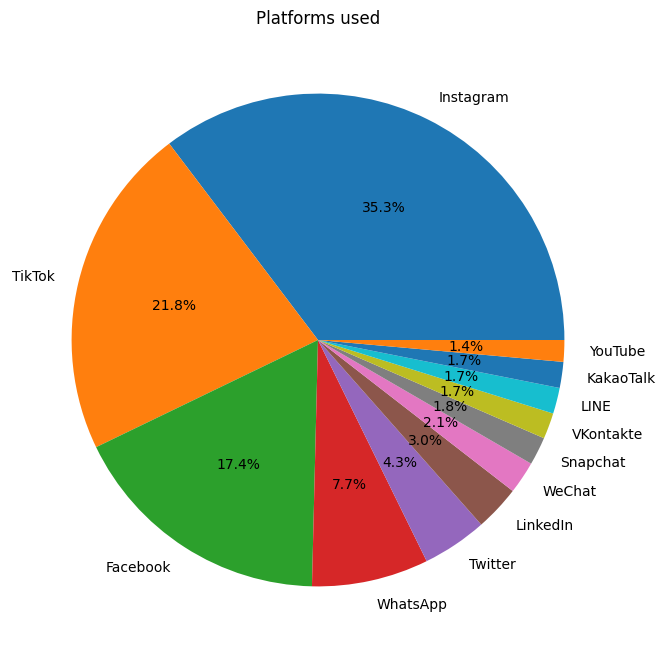

In [15]:
# Most platforms used

plt.figure(figsize=(8,8))
platforms = df['Most_Used_Platform'].value_counts()
plt.pie(platforms,labels=platforms.index,autopct='%1.1f%%')
plt.title("Platforms used")
plt.show()

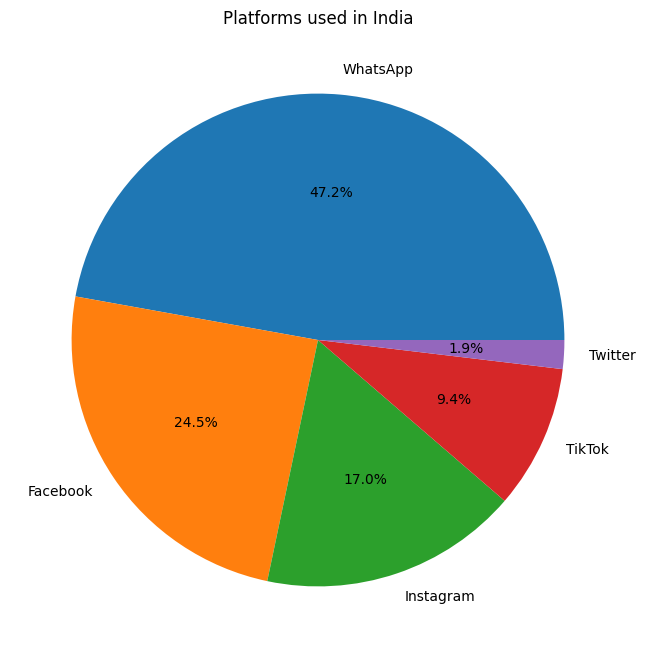

In [6]:
# Most platforms used in India according to data set

plt.figure(figsize=(8,8))
india_df = df[df['Country'] == "India"]
platforms = india_df['Most_Used_Platform'].value_counts()
plt.pie(platforms,labels=platforms.index,autopct='%1.1f%%')
plt.title("Platforms used in India")
plt.show()

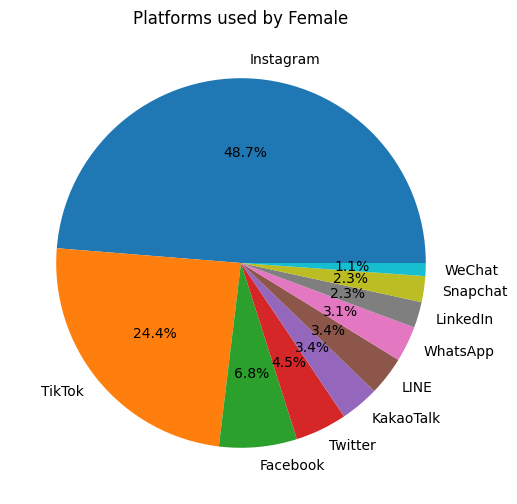

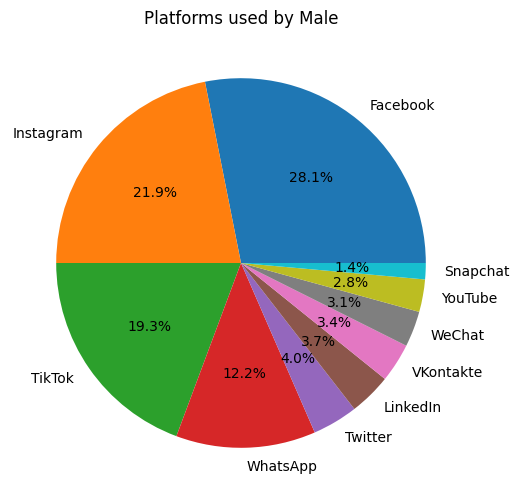

In [20]:
platforms_ind = df[df['Gender']=='Female']
platforms_ind=platforms_ind['Most_Used_Platform']
platforms_ind=platforms_ind.value_counts()
plt.figure(figsize=(6,6))
plt.pie(platforms_ind,labels=platforms_ind.index,autopct='%1.1f%%')
plt.title("Platforms used by Female")
plt.show()
# Platforms used by Males
platforms_ind = df[df['Gender']=='Male']
platforms_ind=platforms_ind['Most_Used_Platform']
platforms_ind=platforms_ind.value_counts()
plt.figure(figsize=(6,6))
plt.pie(platforms_ind,labels=platforms_ind.index,autopct='%1.1f%%')
plt.title("Platforms used by Male")
plt.show()

## Academic Impact Analysis

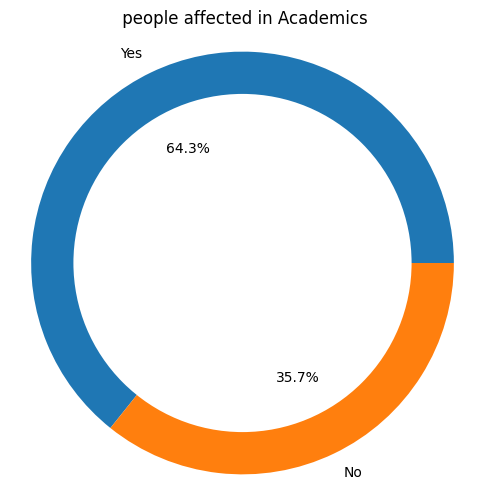

In [21]:
# Distribution of students affected 
affected = df['Affects_Academic_Performance']
affected=affected.value_counts()
plt.figure(figsize=(6,6))
plt.pie(affected,labels=affected.index,autopct='%1.1f%%')
center_a = plt.Circle((0,0),.8,fc='White')
fig = plt.gcf()
fig.gca().add_artist(center_a)
plt.axis('equal')
plt.title(" People affected in Academics")
plt.show()

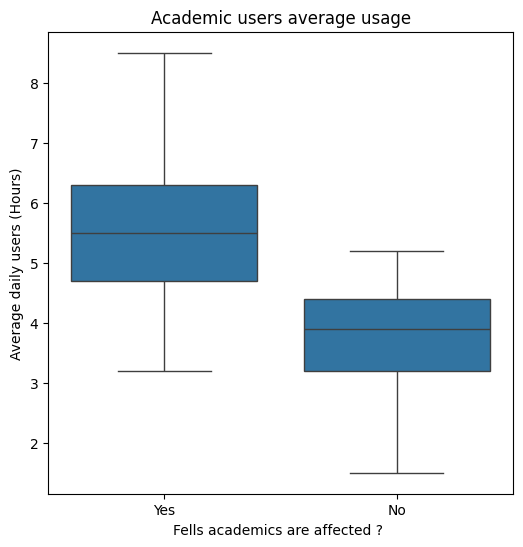

In [22]:
# Impact on academics
plt.figure(figsize=(6,6))
sns.boxplot(df, x='Affects_Academic_Performance',y='Avg_Daily_Usage_Hours')
plt.xlabel('Fells academics are affected ? ')
plt.ylabel('Average daily users (Hours)')
plt.title('Academic users average usage')
plt.show()

<Figure size 500x500 with 0 Axes>

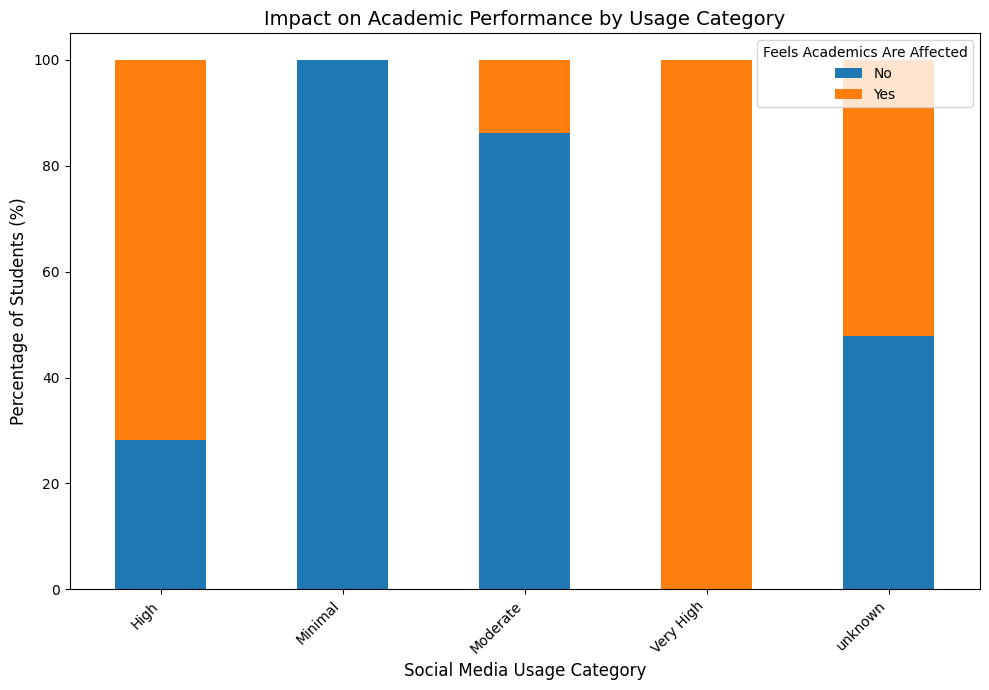

In [23]:
# Impact On Academics

conditions = [df['Avg_Daily_Usage_Hours']<2,
             (df['Avg_Daily_Usage_Hours']>2) &(df['Avg_Daily_Usage_Hours']<4),
             (df['Avg_Daily_Usage_Hours']>4) &(df['Avg_Daily_Usage_Hours']<6),
             (df['Avg_Daily_Usage_Hours']>6)&(df['Avg_Daily_Usage_Hours']<12)

             ]
choices = ['Minimal','Moderate','High','Very High']
df['Usage_Category']=np.select(conditions,choices,default='unknown')
crosstab_df = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
academic_impact_by_usage_percentage = crosstab_df.div(crosstab_df.sum(axis=1), axis=0).mul(100)
plt.figure(figsize=(5, 5))
academic_impact_by_usage_percentage.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Impact on Academic Performance by Usage Category', fontsize=14)
plt.xlabel('Social Media Usage Category', fontsize=12)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.legend(title='Feels Academics Are Affected')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Mental Health and sleep Cycle analysis

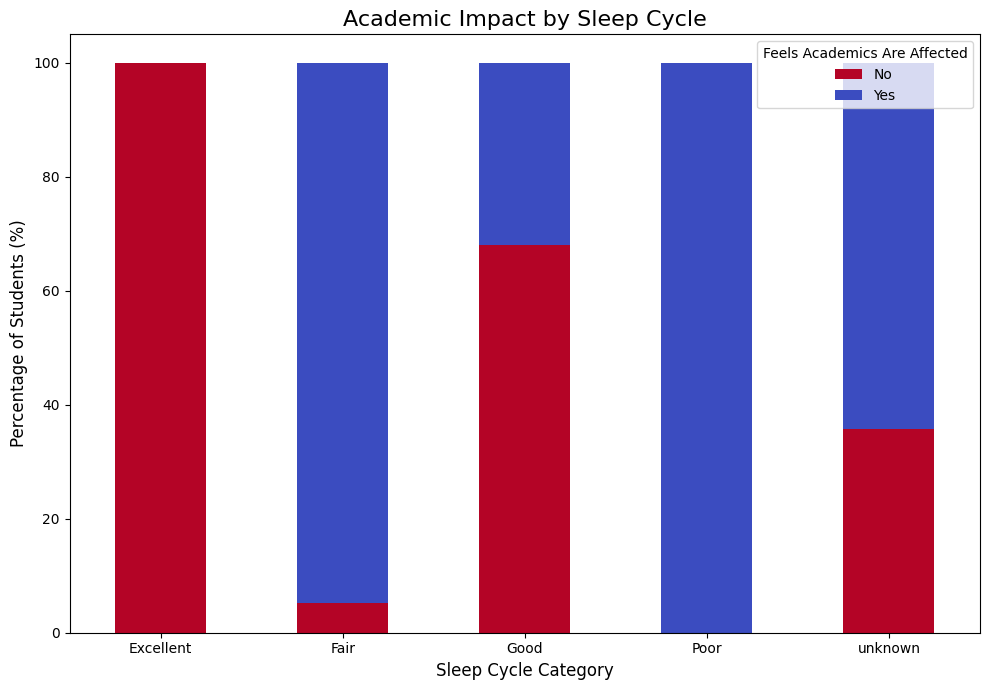

In [27]:
conditions = [df['Sleep_Hours_Per_Night']<5,
             (df['Sleep_Hours_Per_Night']>5) &(df['Sleep_Hours_Per_Night']<7),
             (df['Sleep_Hours_Per_Night']>7) &(df['Sleep_Hours_Per_Night']<9),
             (df['Sleep_Hours_Per_Night']>9)&(df['Sleep_Hours_Per_Night']<10)

             ]
choices = ['Poor','Fair','Good','Excellent']
df['Sleep_Cycle']=np.select(conditions,choices,default='unknown')
crosstab_df = pd.crosstab(df['Sleep_Cycle'], df['Affects_Academic_Performance'])
sleep_impact_percentage = crosstab_df.div(crosstab_df.sum(axis=1), axis=0).mul(100)
ax = sleep_impact_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm_r')
plt.title('Academic Impact by Sleep Cycle', fontsize=16)
plt.xlabel('Sleep Cycle Category', fontsize=12)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Feels Academics Are Affected')
plt.tight_layout()
plt.show()

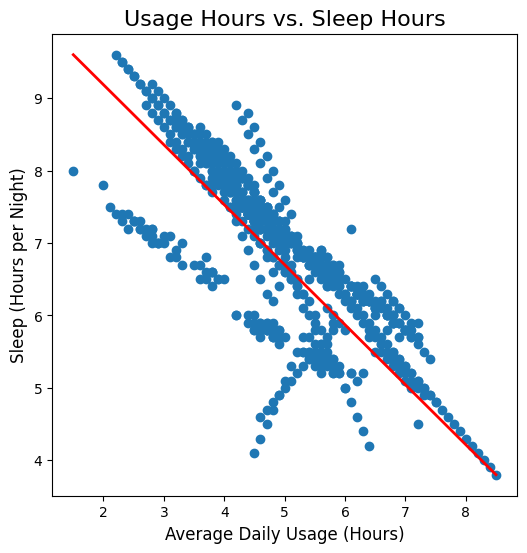

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(df['Avg_Daily_Usage_Hours'],df['Sleep_Hours_Per_Night'])

plt.plot(
    [df['Avg_Daily_Usage_Hours'].min(), df['Avg_Daily_Usage_Hours'].max()],
    [ df['Sleep_Hours_Per_Night'].max(),df['Sleep_Hours_Per_Night'].min()],
    color='red',
    linewidth=2
)
plt.title('Usage Hours vs. Sleep Hours', fontsize=16)
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Sleep (Hours per Night)', fontsize=12)
plt.show()

## Relationship Status Analysis

<Figure size 800x800 with 0 Axes>

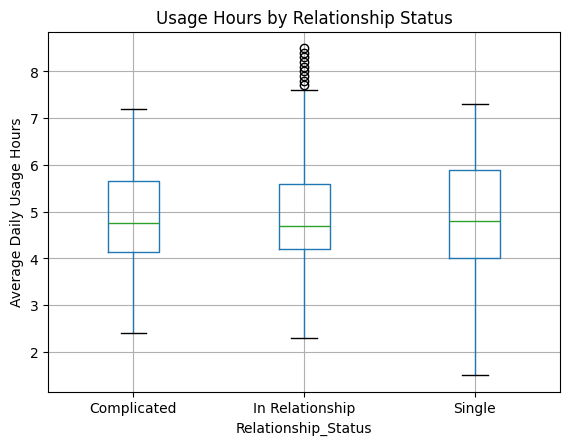

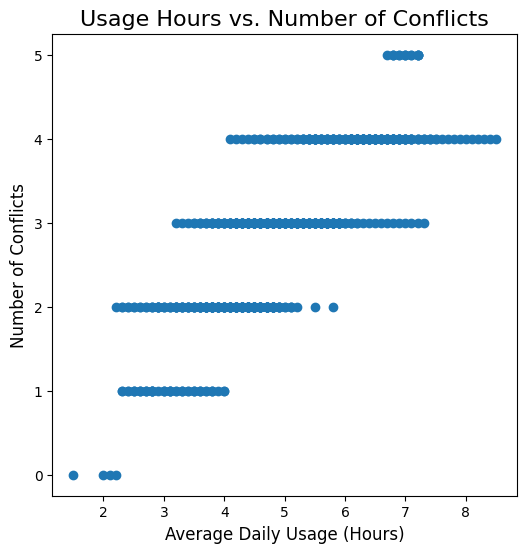

In [28]:

plt.figure(figsize=(8,8))
df.boxplot(column='Avg_Daily_Usage_Hours', by='Relationship_Status')
plt.ylabel('Average Daily Usage Hours')
plt.title('Usage Hours by Relationship Status')
plt.suptitle('')  
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(df['Avg_Daily_Usage_Hours'],df['Conflicts_Over_Social_Media'])
plt.title('Usage Hours vs. Number of Conflicts', fontsize=16)
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Number of Conflicts', fontsize=12)
plt.show()
plt.show()

## Key Findings

High social media usage has been linked to reduced study time, lower concentration levels, and a decline in overall academic performance among students.

Continuous exposure to stimulating content and online social pressures contributes to reduced emotional well-being.

Irregular and extended screen time, especially at night, has significantly affected students’ sleep cycles, leading to drop in academic performance and mental health.

Entertainment-focused platforms encourage more engagement , diverting attention from professional or educational media that could aid in skill development and career growth.

## Conclusion

This analysis helps us understand the impact of social media on an individual’s academic performance, mental well-being, and physical health. Social media usage should be approached with caution to avoid wasting valuable time, as entertainment-driven platforms can be particularly addictive. Students must exercise good judgment in using these platforms, ensuring they do not get distracted from their academic and career goals. Instead, these powerful tools should be leveraged to connect with professionals, gain knowledge, and foster personal and career growth.